# **<center> Data Structures and Algorithms </center>**


## <center> Programming Session 3  </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://mlfbg.github.io/MachineLearningInFinance/">
    <img src="https://drive.google.com/uc?export=view&id=1VwSOlAniiEuf3V4SmLbpAJUSusTS9Orn" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1dgimkhVrYYbiHkbpQ8NUPb7UJpTleS_V?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

# 1. Exploring the dataset

* In this dataset, each entry represents a person who takes a credit by a bank.

* The target is: **loan_status** (0 or 1)
  * 1 in case of default.
  * 0 otherwise.
* It is a **binary classification problem**.

* The dataset is **highly imbalanced**.

* We would like to map the following features to the binary target.
  * **person_age** (numerical) refers to the age.
  *   **person_income** (numerical) refers to the annual income.
  *   **person_home_ownership** (categorical: 'MORTGAGE', 'RENT', 'OWN', 'OTHER').
  *   **person_emp_length** (numerical) refers to the employment length (in years).
  *   **loan_intent** (categorical: 'VENTURE', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'EDUCATION', 'PERSONAL') refers to the loan purpose.
  *   **loan_grade** (categorical: 'A', 'C', 'D', 'B', 'E', 'F','G').
  *   **loan_amnt** (numerical) refers to the loan amount.
  *   **loan_int_rate** (numerical) refers to the loan interest rate.
  *   **loan_percent_income** (numerical).
  *   **cb_person_default_on_file** (categorical: 'N', 'Y') refers to the historical default.
  *   **cb_person_cred_hist_length** (numerical) refers to the credit history length.

### 1.1 Loading the dataset

---
<font color=green>Q1:</font>
<br><font color='green'>
Import the basic libraries `pandas`, `numpy`, `seaborn`, `matplotlib`, `os` and `sklearn`
</font>

---


In [1]:
import pandas as pd # for dataframes
import numpy as np # for arrays
import seaborn as sns # for fancy plots
import matplotlib.pyplot as plt # as usual for plots
import sklearn
import os
plt.style.use("dark_background")

In [2]:
!ls

gdrive	sample_data


---
<font color=green>Q2:</font>
<br><font color='green'>
Using `os.chdir(<path>)`, specify the path to your working directory
</font>

---


In [3]:
# Access files from Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
# Specify the path to your working directory
os.chdir("./gdrive/My Drive/Teaching/Data_Structures_Algorithms_Course/Colabs/Programming_Session_3/Part_1/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!ls

 credit_dataset.csv	      'Solution_Programming_Session_3 (1).ipynb'
 Programming_Session_3.ipynb   Solution_Programming_Session_3.ipynb


In [5]:
df = pd.read_csv("credit_dataset.csv", index_col=0)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,65000,RENT,8.0,VENTURE,E,15000,16.32,1,0.23,Y,4
1,27,72000,RENT,3.0,DEBTCONSOLIDATION,D,25000,15.95,1,0.35,Y,6
2,21,28800,MORTGAGE,0.0,DEBTCONSOLIDATION,A,5000,7.49,0,0.17,N,3
3,30,90000,RENT,14.0,PERSONAL,D,10000,15.62,0,0.11,Y,6
4,30,61000,MORTGAGE,4.0,PERSONAL,A,4500,6.54,0,0.07,N,6


---
<font color=green>Q3:</font>
<br><font color='green'>
Using `pd.read_csv()`, load the dataset and name it `df`.
</font>

---


In [6]:
#df = pd.read_csv("credit_dataset.csv", index_col=0)
url='https://drive.google.com/uc?id=1UcdSRp7CyqJq6RufXeIzQLEXVHGXPIO6'
df = pd.read_csv(url, index_col=0)

---
<font color=green>Q4:</font>
<br><font color='green'>
Shuffle the rows of the dataset.
</font>

---

In [7]:
df = df.sample(frac=1).reset_index(drop=True)

---
<font color=green>Q5:</font>
<br><font color='green'>
Display the 5 first rows of the dataset `df`.
</font>

---

In [8]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,95000,RENT,4.0,PERSONAL,A,2400,5.99,0,0.03,N,3
1,39,170000,MORTGAGE,16.0,MEDICAL,A,32000,7.49,0,0.19,N,13
2,27,60000,RENT,6.0,PERSONAL,A,6000,8.94,0,0.10,N,9
3,23,63000,RENT,0.0,DEBTCONSOLIDATION,A,5600,8.49,0,0.09,N,4
4,23,36100,RENT,0.0,EDUCATION,B,6000,9.88,0,0.17,N,2


---
<font color=green>Q6:</font>
<br><font color='green'>
Display the 5 last rows of the dataset `df`.
</font>

---

In [9]:
df.tail(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,41,72000,OWN,1.0,HOMEIMPROVEMENT,C,10000,13.49,0,0.14,N,11
32577,24,32000,RENT,9.0,MEDICAL,A,3600,7.49,0,0.11,N,3
32578,40,30000,RENT,4.0,MEDICAL,D,5500,14.74,0,0.18,N,12
32579,22,65000,RENT,5.0,DEBTCONSOLIDATION,C,12000,10.99,0,0.18,Y,3
32580,26,79560,MORTGAGE,10.0,DEBTCONSOLIDATION,B,8000,12.53,0,0.10,N,4


---
<font color=green>Q7:</font>
<br><font color='green'>
Using `df.info()`, answer the following questions:
  * How many rows do we have in the dataset ?
  * Do we have missing values ?
</font>

---

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


---
<font color=green>Q8:</font>
<br><font color='green'>
Create a list of the categorical variables named `catvars` and a list of numerical variables named `numvars`.
</font>

---

In [11]:
#create quickaccess list with categorical variables labels
catvars = list(df.select_dtypes(include = 'object').columns)
#create quickaccess list with numerical variables labels
numvars = list(df.select_dtypes(exclude = 'object').columns)
numvars.remove("loan_status")

In [12]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

---
<font color=green>Q9:</font>
<br><font color='green'>
Split your dataset into the training set (70% of the data) called `df_train` and the test set (30% of the data) named `df_test`, as described in the figure below.
</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1ZbYtw7eU6KdGkIhLUfwsYFZWPMg61jer"></center>

In [13]:
# Threshold
threshold = 0.7*len(df)

# Splitting the dataset
df_train = df.loc[:threshold].reset_index(drop=True)
df_test = df.loc[threshold:].reset_index(drop=True)

In [14]:
print("We have {} training samples".format(len(df_train)))
print("We have {} testing samples".format(len(df_test)))

We have 22807 training samples
We have 9774 testing samples


### 1.2 Adding a new categorical feature

---
<font color=green>Q10:</font>
<br><font color='green'>
Show the sub-dataframe containing the numerical variables.
</font>

---

In [15]:
numvars

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [16]:
df_train[numvars]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,24,95000,4.0,2400,5.99,0.03,3
1,39,170000,16.0,32000,7.49,0.19,13
2,27,60000,6.0,6000,8.94,0.10,9
3,23,63000,0.0,5600,8.49,0.09,4
4,23,36100,0.0,6000,9.88,0.17,2
...,...,...,...,...,...,...,...
22802,28,125000,8.0,8000,11.14,0.06,6
22803,29,59000,3.0,6000,7.88,0.10,8
22804,27,68000,6.0,2000,13.80,0.03,5
22805,27,65000,0.0,6000,11.14,0.09,9


---
<font color=green>Q11:</font>
<br><font color='green'>
Using `df.describe()`, describe the distribution of the numerical features.
</font>

---

In [17]:
df_train[numvars].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,22807.000000,2.280700e+04,22807.000000,22807.000000,22807.000000,22807.000000,22807.000000
mean,27.727057,6.604578e+04,4.773754,9570.881747,11.005343,0.169993,5.804621
std,6.339762,6.509403e+04,4.163272,6319.575153,3.087663,0.106837,4.048094
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12237.500000,13.160000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [18]:
df_train["person_income"].describe()

,person_income
count,2.280700e+04
mean,6.604578e+04
std,6.509403e+04
min,4.080000e+03
25%,3.840000e+04
50%,5.500000e+04
75%,7.920000e+04
max,6.000000e+06


---
<font color=green>Q12:</font>
<br><font color='green'>
Create a new categorical feature named `category_income` assigning a category 'A', 'B', 'C' and 'D' according to the feature `person_income` as follows:
  * If `person_income` is in [0, 39000], then `category_income = 'D'`.
  * If `person_income` is in [39000, 55000], then `category_income = 'C'`.
  * If `person_income` is in [55000, 79000], then `category_income = 'B'`.
  * If `person_income` is in [79000, +$\infty$], then `category_income = 'A'`.
</font>

---

In [19]:
# Age intervals
intervals = (0, 39000, 55000, 79000, 6000000)
# Categories
categories = ["D", "C", "B", "A"]
# Create the new feature
df_train["category_income"] = pd.cut(df_train.person_income, intervals, labels=categories)
df_test["category_income"] = pd.cut(df_test.person_income, intervals, labels=categories)

In [20]:
# df_train["category_income"] = ''
# for index, row in df_train.iterrows():
#   # value of income
#   income = row["person_income"]
#   if income < 300000:
#     category = "D"
#   elif income < 50000:
#     category = "C"
#   elif income < 80000:
#     category = "B"
#   else:
#     category = "A"
#   df_train.at[index, "category_income"] = category

In [21]:
# del df_train["category_income"]
# def create_cat(income):
#   if income < 300000:
#     category = "D"
#   elif income < 50000:
#     category = "C"
#   elif income < 80000:
#     category = "B"
#   else:
#     category = "A"
#   return category
# df_train["category_income"] = df_train["person_income"].apply(create_cat)

In [22]:
df_train.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,category_income
0,24,95000,RENT,4.0,PERSONAL,A,2400,5.99,0,0.03,N,3,A
1,39,170000,MORTGAGE,16.0,MEDICAL,A,32000,7.49,0,0.19,N,13,A
2,27,60000,RENT,6.0,PERSONAL,A,6000,8.94,0,0.10,N,9,B
3,23,63000,RENT,0.0,DEBTCONSOLIDATION,A,5600,8.49,0,0.09,N,4,B
4,23,36100,RENT,0.0,EDUCATION,B,6000,9.88,0,0.17,N,2,D
5,33,59000,RENT,17.0,MEDICAL,B,9600,9.91,0,0.16,N,8,B
6,41,43000,RENT,2.0,MEDICAL,C,4000,13.23,0,0.09,N,16,C
7,22,21000,RENT,1.0,PERSONAL,A,8500,7.51,1,0.40,N,4,D
8,22,37200,RENT,6.0,MEDICAL,B,10000,10.99,1,0.27,N,3,D
9,27,36000,RENT,0.0,DEBTCONSOLIDATION,C,8000,13.92,0,0.22,Y,9,D


---
<font color=green>Q13:</font>
<br><font color='green'>
Add the new category `category_income` to the list of categorical variables `catvars`.
</font>

---

In [23]:
catvars.append("category_income")

In [24]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

# 2. Visualization

### 2.1 Count plot for a categorical variable.

A **count plot** can be thought of as a histogram across a categorical variable. It shows the counts of observations in each category using bars.



---
<font color=green>Q14:</font>
<br><font color='green'>
Using `seaborn.countplot`, display the **count plot** of the categorical variable `'person_home_ownership'` (where you separate the counts according to the targets 0/1).
</font>

---

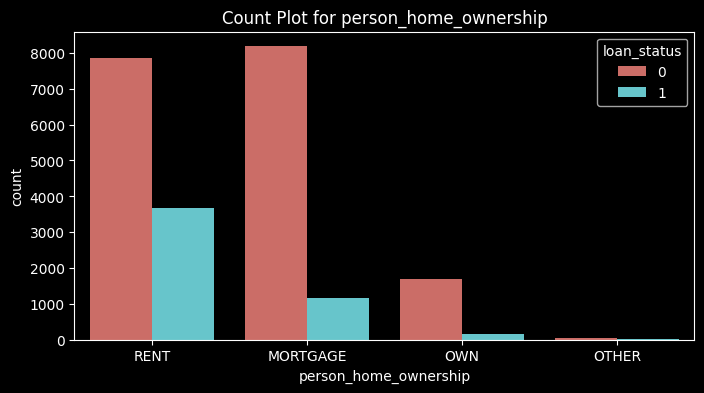

In [25]:
fig = plt.figure(figsize=(8, 4))
g = sns.countplot(x="person_home_ownership", data=df_train, palette="hls", hue="loan_status")
g.set_title("Count Plot for person_home_ownership")
plt.show()

### 2.2 Numerical variable distribution

We want to plot a univariate distribution of a numerical variable associated to the "0" and "1" targets.

---
<font color=green>Q15:</font>
<br><font color='green'>
Using `seaborn.distplot`, display the distribution of the `person_income` numerical variable for the "0" and "1" targets.
</font>

---

In [26]:
df_train[df_train["loan_status"]==0]["person_income"]

,person_income
0,95000
1,170000
2,60000
3,63000
4,36100
...,...
22802,125000
22803,59000
22804,68000
22805,65000


In [27]:
df_train[df_train["loan_status"] == 0]["person_income"]

,person_income
0,95000
1,170000
2,60000
3,63000
4,36100
...,...
22802,125000
22803,59000
22804,68000
22805,65000


<ipython-input-28-5f528e08ee7f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train[df_train["loan_status"]==0]["person_income"], color="g")
<ipython-input-28-5f528e08ee7f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train[df_train["loan_status"]==1]["person_income"], color

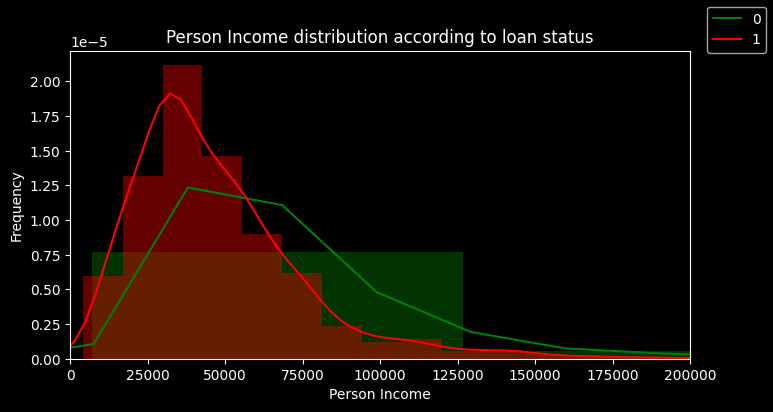

In [28]:
fig = plt.figure(figsize=(8, 4))
g = sns.distplot(df_train[df_train["loan_status"]==0]["person_income"], color="g")
g = sns.distplot(df_train[df_train["loan_status"]==1]["person_income"], color="r")
g.set_xlabel("Person Income")
g.set(xlim=(0, 200000))
g.set_ylabel("Frequency")
g.set_title("Person Income distribution according to loan status")
fig.legend(labels=["0", "1"])
plt.show()

---
<font color=green>Q16:</font>
<br><font color='green'>
What can you say about these distributions ?
</font>

---

---
We can see that the distribution of `person_income` associated the target '0' (No default) is shifted to the right, in comparison with the one associated with the target '1' (default).

---

### 2.3 Boxplots

Now, we want to show the distribution of a numerical variable for all the values of a categorical variable.

To that end, we use box plots:

Boxplots display the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

* **median (Q2/50th Percentile)**: the middle value of the dataset.
* **first quartile (Q1/25th Percentile)**: the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* **third quartile (Q3/75th Percentile)**: the middle value between the median and the highest value (not the “maximum”) of the dataset.
* **interquartile range (IQR)**: 25th to the 75th percentile.
* **whiskers** (shown in blue)
* **outliers** (shown as green circles)
* **maximum**: Q3 + 1.5*IQR
* **minimum**: Q1 -1.5*IQR

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1g3G3I6msJQ4iNXUUr_Z5cZAji14Dj5lk"></center>


---
<font color=green>Q17:</font>
<br><font color='green'>
Using `seaborn.boxplot`, describe the distribution of the numerical feature `loan_amnt` according to the new categorical variable `category_income` and the targets `loan_status`.
</font>

---

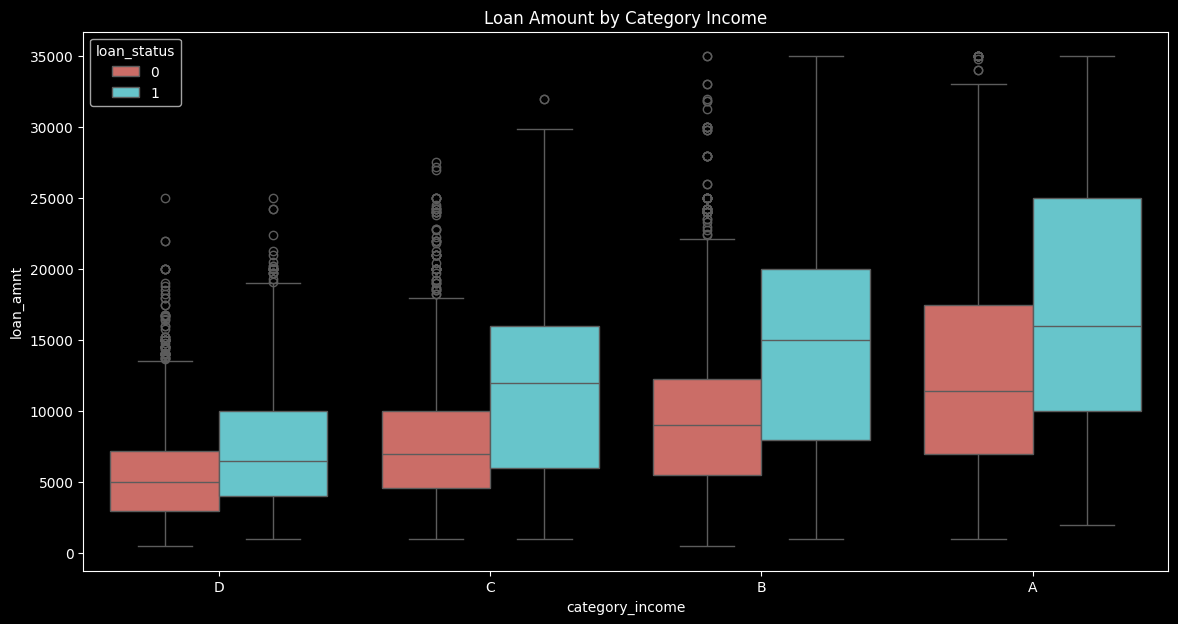

In [29]:
fig = plt.figure(figsize=(14, 7))
g = sns.boxplot(x="category_income", y="loan_amnt", data=df_train, palette="hls",hue="loan_status")
g.set_title("Loan Amount by Category Income")
plt.show()

# 3. Preprocessing the data

### 3.1. Preprocessing categorical variables

* Let's suppose we have a categorical variable X that can take K different values $\{1, \dots, K\}$

* **One hot encoding** a category consists in transforming the category into a vector $\in \mathbb{R}^K$ where we have 1 in the position of the category and zeros elswhere.

* For instance, if $K=4$, the category "3" for one sample is one hot encoded into the vector $[0, 0, 1, 0]$


* Therefore, we can turn a catogorical feature into K features.

* As each sample is only mapped to one category, the K features are not independent (the K-th feature can be deduced from the K-1 first features). Therefore, we usually drop one of the columns.

<center><img width="800" src = "https://drive.google.com/uc?export=view&id=1-WOjGo6OFQ0Cuq4mAmZ8oh6T2D6Y1gVL"></center>

---
<font color=green>Q18:</font>
<br><font color='green'>
For each categorical variable, pring the names of the different categories and their number.
</font>

---

The categories:

In [30]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

In [31]:
df_train[catvars].nunique()

,0
person_home_ownership,4
loan_intent,6
loan_grade,7
cb_person_default_on_file,2
category_income,4


In [32]:
for categorical_variable in catvars:
  print("Feature: {} ... Categories: {}".format(categorical_variable, df_train[categorical_variable].unique()))

Feature: person_home_ownership ... Categories: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
Feature: loan_intent ... Categories: ['PERSONAL' 'MEDICAL' 'DEBTCONSOLIDATION' 'EDUCATION' 'VENTURE'
 'HOMEIMPROVEMENT']
Feature: loan_grade ... Categories: ['A' 'B' 'C' 'E' 'D' 'F' 'G']
Feature: cb_person_default_on_file ... Categories: ['N' 'Y']
Feature: category_income ... Categories: ['A', 'B', 'D', 'C']
Categories (4, object): ['D' < 'C' < 'B' < 'A']


The number of categories:

---
<font color=green>Q19:</font>
<br><font color='green'>
For each of the categorical variables, what is the number of possible values ?
</font>

---

In [33]:
df_train[catvars].nunique()

,0
person_home_ownership,4
loan_intent,6
loan_grade,7
cb_person_default_on_file,2
category_income,4


In [34]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

In [35]:
numvars

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

---
<font color=green>Q20:</font>
<br><font color='green'>
Print the shape of `df_train` before One Hot Encoding.
</font>

---

In [36]:
# 1 for target (loan_status)
# 5 categorical variables
# 7 numerical variables
df_train.shape

(22807, 13)

---
<font color=green>Q21:</font>
<br><font color='green'>
Using `pandas.get_dummies` or `sklearn.preprocessing.OneHotEncoder`, transform each categorical variable (with K categories) into K-1 new feature columns.
</font>

---

In [37]:
df_train = pd.get_dummies(df_train,
                          columns=catvars,
                          dummy_na=False,
                          drop_first=True)

In [38]:
df_test = pd.get_dummies(df_test,
                         columns=catvars,
                         dummy_na=False,
                         drop_first=True)

---
<font color=green>Q22:</font>
<br><font color='green'>
Explain the new shape of `df_train` after the one hot encoding ?
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1eEOIb904c2UOT82AUYdjaZINj9rVr1Ji"></center>

In [39]:
df_train.shape

(22807, 26)

---
* Number of Dummy variables: 18.
  * person_home_ownership     ---->   4 possible values ----> 3 Dummy variables
  * loan_intent               ---->   6 possible values ----> 5 Dummy variables
  * loan_grade                ---->   7 possible values ----> 6 Dummy variables
  * cb_person_default_on_file ---->   2 possible values ----> 1 Dummy variable
  * category_income           ---->   4 possible values ----> 3 Dummy variables

* Number of Numerical variables: 7.

* One column for the target `loan_status`.

* Total number of columns: 26
---

### 3.2 Preprocessing Numerical Variables

---
<font color=green>Q23:</font>
<br><font color='green'>
Split `df_train` into `df_train_features` and `df_train_targets` and `df_test` into `df_test_features` and `df_test_targets` as shown in the figure below.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1V0Sjgbbef6mdNSAwKAUQLeJlOWJU-3np"></center>

In [40]:
df_train_targets = df_train['loan_status']
df_train_features = df_train.drop('loan_status',axis=1)

df_test_targets = df_test['loan_status']
df_test_features = df_test.drop('loan_status',axis=1)

---
<font color=green>Q24:</font>
<br><font color='green'>
Split each of `df_train_features` and `df_test_features` as shown in the figure below:

* `df_train_features_numvars` and `df_test_features_numvars` containing the training abd testing numerical features
* `df_train_features_rest` and `df_train_features_rest` containing the rest of the features.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1loF_Uk967CSVlGKikXWbDxwpKAEGaDlg"></center>

In [41]:
df_train_features_numvars = df_train_features[numvars]
df_train_features_rest = df_train_features[df_train_features.columns[~df_train_features.columns.isin(numvars)]]


df_test_features_numvars = df_test_features[numvars]
df_test_features_rest = df_test_features[df_test_features.columns[~df_test_features.columns.isin(numvars)]]

---
<font color=green>Q25:</font>
<br><font color='green'>
Plot the histograms of the numerical variables `df_train_features_numvars` using `dataframe.hist()`
</font>

---

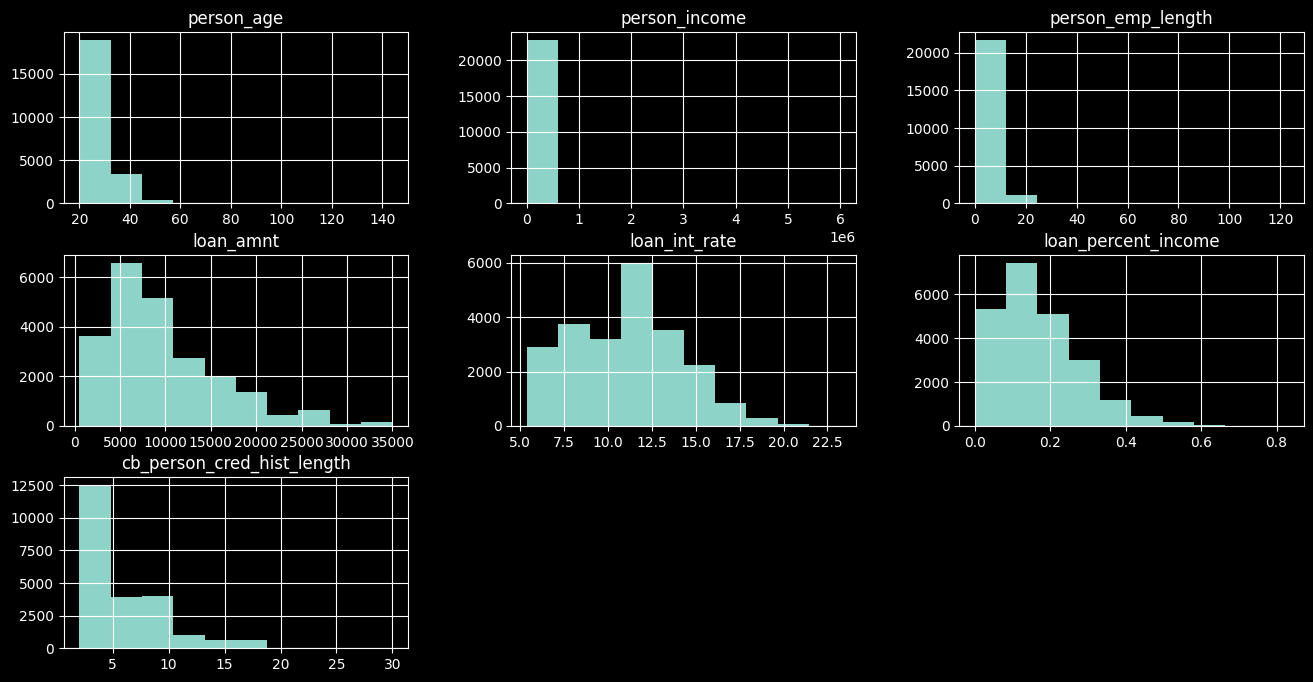

In [42]:
df_train_features_numvars.hist(figsize=(16, 8))
plt.show()

There are two ways of scaling a numerical variable:

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1UiUAyNligNF9TQkavRdatKR-4WI3pxqz"></center>

---
<font color=green>Q26:</font>
<br><font color='green'>
From `sklearn.preprocessing`, scale the numerical features using one of the two scaling methods:
  * `StandardScaler()` to get a distribution with a mean = 0 and std = 1.
  * `MinMaxScaler()` to map the data to the range [0, 1]
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1b2nPF0z0eMVwvH3g5Yu40AtKaQHFlMUa"></center>

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Instantiate models
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
# fit_transform() on train transform() on test
# Fit and Transform the training numerical variables using StandardScaler
df_train_features_numvars_std = pd.DataFrame(standard_scaler.fit_transform(df_train_features_numvars))
# Transform the testing numerical variables using StandardScaler
df_test_features_numvars_std = pd.DataFrame(standard_scaler.transform(df_test_features_numvars))

# Fit and Transform the training numerical variables using MinMaxScaler
df_train_features_numvars_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_train_features_numvars))
# Transform the testing numerical variables using MinMaxScaler
df_test_features_numvars_minmax = pd.DataFrame(minmax_scaler.transform(df_test_features_numvars))

---
<font color=green>Q27:</font>
<br><font color='green'>
Plot the histograms of the numerical features after the scaling process.
</font>

---

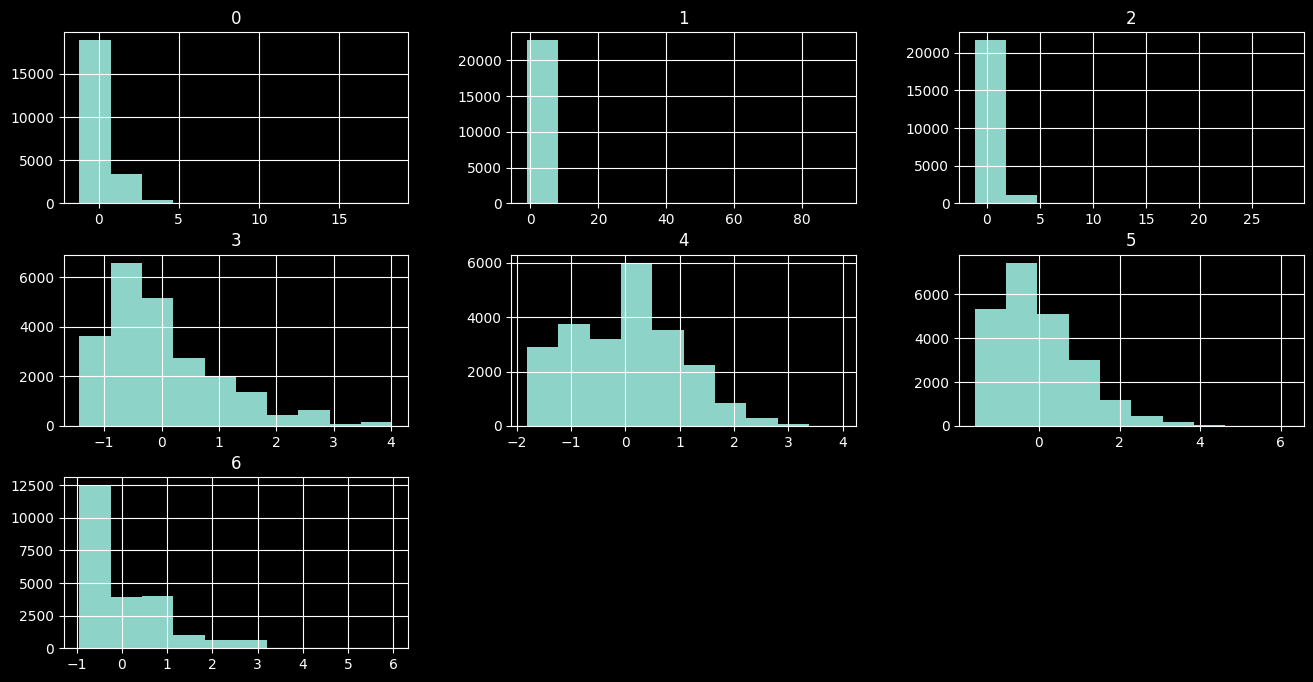

In [44]:
df_train_features_numvars_std.hist(figsize=(16, 8))
plt.show()

---
<font color=green>Q28:</font>
<br><font color='green'>
Concatenate `df_train_features_rest` with your scaled dataframe of numerical features `df_train_features_numvars_std` to get the final dataframe `df_train_features_processed`. Same for the test data as shown in the figure below.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1VgznTzwgu32QTb6bjxdDzvu8gF5PyEvt"></center>

In [45]:
df_train_features_processed = pd.concat([df_train_features_numvars_std, df_train_features_rest], axis=1)
df_test_features_processed = pd.concat([df_test_features_numvars_std, df_test_features_rest], axis=1)

---
<font color=green>Q29:</font>
<br><font color='green'>
Show the first 5 rows of the new dataset
</font>

---

In [46]:
df_train_features_processed.head(5)

,0,1,2,3,4,5,6,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,category_income_C,category_income_B,category_income_A
0,-0.587899,0.444816,-0.185856,-1.134734,-1.624352,-1.310380,-0.692840,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1.778172,1.597020,2.696555,3.549228,-1.138537,0.187267,1.777512,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-0.114685,-0.092880,0.294546,-0.565063,-0.668916,-0.655159,0.789371,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,-0.745637,-0.046792,-1.146660,-0.628360,-0.814661,-0.748762,-0.445805,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,-0.745637,-0.460049,-1.146660,-0.565063,-0.364472,0.000062,-0.939876,False,False,True,...,True,False,False,False,False,False,False,False,False,False


---
<font color=green>Q30:</font>
<br><font color='green'>
What are the shapes of `df_train_features_processed`, `df_train_targets`, `df_test_features_processed` and `df_test_targets`
</font>

---

In [47]:
df_train_features_processed.shape

(22807, 25)

In [48]:
df_train_targets.shape

(22807,)

In [49]:
df_test_features_processed.shape

(9774, 25)

In [50]:
df_test_targets.shape

(9774,)

---
<font color=green>Q31:</font>
<br><font color='green'>
Convert the aforementioned dataframes into `numpy` arrays to get `X_train`, `X_test`, `y_train`, `y_test`.
</font>

---

In [51]:
X_train = df_train_features_processed.values
X_test = df_test_features_processed.values

y_train = df_train_targets.values
y_test = df_test_targets.values

# 4. Fine Tuning a Supervised Model

### 4.1 Evaluation Metrics

First, let's start by a review of the different evaluation metrics

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1SbB_CEcOCblu1sUwzGAOwn5oQRQGEQxS"></center>

The F1 score is calculated as follows:

$$
\text{F1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

---
<font color=green>Q32:</font>
<br><font color='green'>
What is the distribution of the targets `loan_status` ?
</font>

---

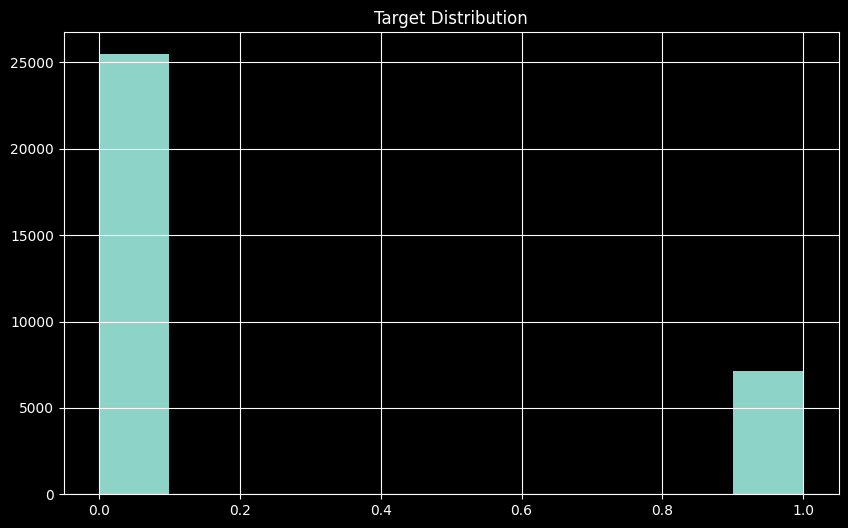

In [52]:
df["loan_status"].hist(figsize=(10, 6))
plt.title("Target Distribution")
plt.show()

---
<font color=green>Q33:</font>
<br><font color='green'>
Which of the two errors is the most dangerous one for the credit problem ?
</font>

---

---
The dataset is imbalanced, we should avoid optimizing the **accuracy score**.

The worst error is to predict a negative class (no default) to a sample that is actually in the positive class (i.e default).

Therefore, the metric we should optimize is the recall.

---

A brief review of Cross Validation:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1TQfP49ZaOoAq4Egt0NuIsWYLHb8Maris"></center>

---
<font color=green>Q34:</font>
<br><font color='green'>
Using `cross_val_score` from `sklearn.model_selection`, write a function that takes as inputs the **classifier**, the **training features** and the **training targets**. The function should output the distribution (the mean and the std) of the following performance measures using cross validation (with K=5).

* Presicion
* Recall
* f1 score
* auc
* accuracy
</font>

---

In [53]:
# Import module
from sklearn.model_selection import cross_val_score
# Cross Validation to test and anticipate overfitting problem
def crossvalidate(clf, X, y):
    precision = cross_val_score(clf, X, y, cv=5, scoring='precision') # precision is the list of all precisions associated with each fold
    recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
    f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
    roc_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
    accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std()))
    print("Cross Validation f1 score: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std()))
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std()))

---
<font color=green>Q35:</font>
<br><font color='green'>
Using `confusion_matrix` from `sklearn.metrics`, write a function that takes as inputs `y_test` and `y_hat` (vector of 0-1). The function should output a plot of the confusion matrix on the test set.
</font>

---

In [54]:
# Import module
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_hat):
  fig = plt.figure(figsize=(10, 8))
  g = sns.heatmap(confusion_matrix(y_test, y_hat),
              annot=True,
              fmt="0.0f")
  g.set_xlabel("Predicted")
  g.set_ylabel("Actual")
  g.set_title("Confusion Matrix on the test set")
  plt.show()

### 4.2 Fine Tuning Random Forest

Brief review of Hyperparameters Optimization:

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1j93wPCK9TyV0oi_kj-UhijNJTLafH4fa"></center>

We would like to tune the following hyperparameters:

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* bootstrap = method for sampling data points (with or without replacement)

---
<font color=green>Q36:</font>
<br><font color='green'>
Define a dictionary called `random_grid` which maps each of the hyperparameters to a list of possibilities. Example:
* "n_estimators" : [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
* "max_features" : ["auto", "sqrt"]
* "max_depth" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
* "bootstrap" : [True, False]
</font>

---

In [55]:
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 250, 300, 350, 400]}


---
<font color=green>Q37:</font>
<br><font color='green'>
Using `RandomizedSearchCV` from `sklearn.model_selection` and `RandomForestClassifier` from `sklearn.ensemble`, find the best combination of hyperparameters among 20 possibilities.

</font>

---

In [56]:
# Import Modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation,
# search across 5 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_rf,
                               param_distributions = random_grid, # grid of all possible combinations of hp (defined in a dictionary)
                               n_iter = 10, # Number of hp that you want to test
                               cv = 3, # Number of folds in cross validation
                               verbose=2,
                               scoring="f1",# Evaluation metric
                               random_state=42, # fixing the seed
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400]},
                   random_state=42, scoring='f1', verbose=2)

---
<font color=green>Q38:</font>
<br><font color='green'>
What are the hyperparameters of the best model `rf_best`?

</font>

---

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=110, n_estimators=300,
                       random_state=42)

In [58]:
rf_best = rf_random.best_estimator_ # Random forest corresponding to the best combination of HP

---
<font color=green>Q39:</font>
<br><font color='green'>
Using `classification_report` from `sklearn.metrics`, display the different performance measures and the confusion matrix for the "optimal" model `rf_best`.
</font>

---

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7674
           1       0.94      0.72      0.82      2100

    accuracy                           0.93      9774
   macro avg       0.93      0.85      0.89      9774
weighted avg       0.93      0.93      0.93      9774



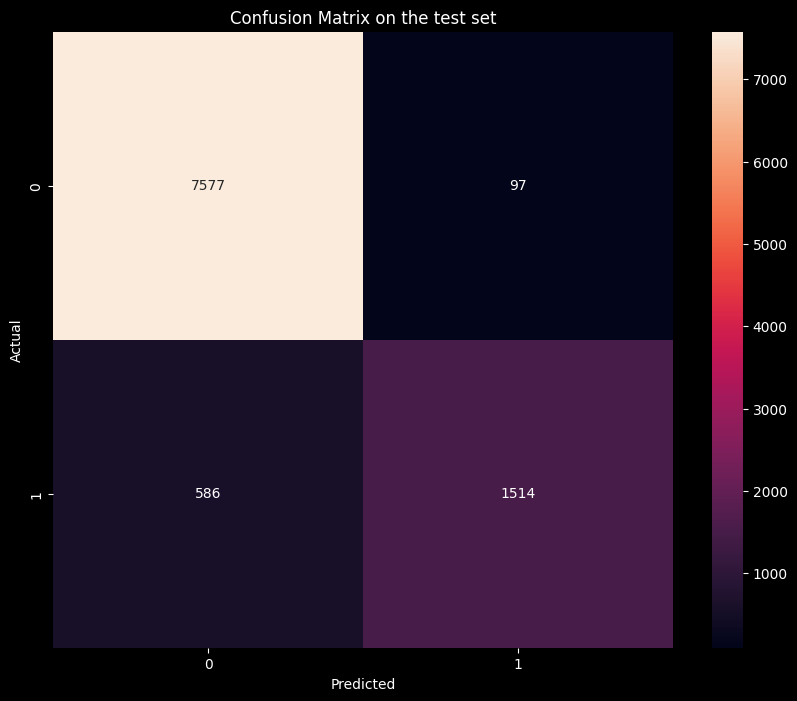

In [59]:
# Evaluation performances
from sklearn.metrics import classification_report
# rf_best.predict() is gonna output binary values 0/1 based on a threshold of 0.5 vs rf_best.predict_proba() outputs probailities
y_hat = rf_best.predict(X_test)
print(classification_report(y_test, y_hat))
# Confusion Matrix
plot_confusion_matrix(y_test, y_hat)

# 5. Adjusting the threshold

### 5.1 A small review



As explained in Lecture 1, the AUC is defined as the area under the curve, i.e, the area between the curve and the x-axis.

* Let us consider a dataset $\mathcal{S} = \{ (x_1, y_1), \dots, (x_n, y_n) \}$ where $\forall i \in \{1, \dots, n\} \quad x_i \in \mathbb{R}^d, \ y_i \in \{0, 1\} \}$

* A classification algorithm (like Random Forest), trained on $\mathcal{S}$, maps each new obersvation $x^* \in \mathbb{R}^d$ to a score $\hat{p}(x^*) \in [0, 1]$ signifying the algorithm's confidence that the label of $x^*$ is $y^* = 1$.


* Let us split the training feature vectors  $\{(x_i)\}_{1 \leq i \leq n}$ into two groups:
  * A group $\mathcal{G}_+$ of feature vectors associated with the positive label.  
  * A group $\mathcal{G}_-$ of feature vectors associated with the negative label.

* We can then represent two distribution of scores:
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_+$
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_-$

* The figure below summarizes the process described.

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=17AynSe1QDaiZR-_9FpVQMfOzKRdR_Lfi"></center>

* Let us represent the two distributions in one figure:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1tKSqfs1ITKikr8F4oaRSs6t2HLN0hIIf"></center>


* The **AUC** can be interpreted as a measure of the quality of seperation between the aforementioned distributions.

* Mathematically speaking, the **AUC** gives the probability that the classifier gives a higher score to a positive sample than to a negative sample. (you can read the proof in the [optional reading](https://colab.research.google.com/drive/1gcbB3-3Y6AfohDFJYKmFPF2G-4EIPDTi?usp=sharing)).




* The method `rf_best.predict_proba()` maps each element $x$ to a prediction (or a score) $p(x) \in [0, 1]$ reflecting the confidence of the classifier in assigning the target $y=1$ to the feature vector $x$.


<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1znqNbk_1GLWeTgxf3PU0HcGg1r1L-uLo"></center>


* In order to convert the continuous prediciton $p(x)$ into a binary prediction $\hat{y} \in \{0, 1 \}$, we need to choose a **threshold** above which we assign the positive label.

* The default threshold is 0.5 and the method used to map $x$ to a binary output with this default threshold 0.5 is `rf_best.predict()`

### 5.2 Adjusting the probability threshold

**Our objective in this section is to adjust the threshold in order to match a desired recall**

In order to plot the ROC curve, you will have to install `plot_metric` using the following command line:

```
!pip install plot_metric
```

In [ ]:
!pip install plot_metric

---
<font color=green>Q40:</font>
<br><font color='green'>
Plot the ROC curve of the best model `rf_best` using `BinaryClassification` from `plot_metric.functions`
</font>

---


In [ ]:
# Import module
from plot_metric.functions import BinaryClassification

# Plot the ROC curve
bc = BinaryClassification(y_test, rf_best.predict_proba(X_test)[:, 1], labels=[0, 1])
plt.figure(figsize=(10, 6))
bc.plot_roc_curve()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_hat = rf_best.predict(X_test)
print(classification_report(y_test, y_hat))

---
<font color=green>Q41:</font>
<br><font color='green'>
Let us fix an objective recall of 0.8. By decreasing the threshold progressively from 1 to 0, determine the maximum threshold for which we can have a recall of 0.8, called `best_threshold`
</font>

---


In [ ]:
# Let us find the threshold with the highest recall
from sklearn.metrics import recall_score
# Calculate the prediction scores y_hat_proba associated with X_test
y_hat_proba = rf_best.predict_proba(X_test)[:, 1]

# The objective recall
OBJECTIVE_RECALL = 0.8

# Initialize the best threshold to 0.5
best_threshold = 0.5
# Calculate the binary prediction y_hat associated with the threshold 0.5
y_hat = (y_hat_proba > best_threshold)
# Calculate the recall associated with the threshold 0.5
best_recall = recall_score(y_test, y_hat)

# Find the best threshold
for th in np.arange(0.01, 1, 0.01)[::-1]:
  # Calculate the binary prediction y_hat associated with the threshold th
  y_pred = (y_hat_proba > th)
  recall = recall_score(y_test, y_pred)
  if recall > OBJECTIVE_RECALL:
    best_recall = recall
    best_threshold = th
    break
print("The best Threshold is {}...The best recall is {}".format(best_threshold, best_recall))

---
<font color=green>Q42:</font>
<br><font color='green'>
Plot the ROC curve and show the point with the coordinated (FPR(best_threshold), TPR(best_treshold)).
</font>

---

In [ ]:
# let's use another probability threshold so that we can get to the elbow position in the above curve
bc = BinaryClassification(y_test, rf_best.predict_proba(X_test)[:, 1], threshold=best_threshold, labels = [0, 1])
plt.figure(figsize=(10, 6))
bc.plot_roc_curve()
plt.show()

---
<font color=green>Q43:</font>
<br><font color='green'>
Plot the confusion matrix associated with `best_threshold`
</font>

---


In [ ]:
# Calculate the prediction scores y_hat_proba associated with X_test
y_hat_proba = rf_best.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate the binary prediction y_hat associated with the threshold th
y_hat = (y_hat_proba >= best_threshold)

In [ ]:
# plot the confusion matrix
fig = plt.figure(figsize=(10, 8))
g = sns.heatmap(confusion_matrix(y_test, y_hat),
            annot=True,
            fmt="0.0f")
g.set_xlabel("Predicted")
g.set_ylabel("Actual")
g.set_title("Confusion Matrix on the test set")
plt.show()

---
<font color=green>Q44:</font>
<br><font color='green'>
Print the evaluation metrics associated with `best_threshold`
</font>

---


In [ ]:
# print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

# Wrap-up

During this session we learned:
* How to load and visualize a dataset.
* How to process categorical and numerical features.
* What are the most suitable evaluation metrics in the case of an imbalanced dataset, especially the recall and the AUC.
* How to adjust the probability threshold so that it matches the objective error of a business problem.

# Optional Exercise: Resampling techniques

* The main problem when we train a model using an imbalanced dataset is that it results in a biased classifier towards the majority class.

* There are two ways to overcome this bias problem:
  * **Undersampling**: In this case, we randomly select as many observations of the majority class $\mathcal{G}_-$ as we have for the minority class $\mathcal{G}_+$. (See figure below)
  
  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=106_U8l014dk7LybyoPpUEiLlABfeWbhZ"></center>

  * **Oversampling**: In this case, we prefer to have more elements from the minority class $\mathcal{G}_+$. Hence, we either create duplicates of the minority class or create synthetic datapoints so that we reach $|\mathcal{G}_-|$ samples (where $|F|$ denotes the number of elements of $F$). One way of creating synthetic data points is called the **SMOTE** (Synthetic Minority Oversampling Technique). The method is described in [Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf) and can be summarized as follows:
    * First, a random example $x_1$ is chosed from the minority class $\mathcal{G}_+$.
    * Then, we find the k nearest neighbors for that example (typically $k=5$).
    * We randomly select one of these k neighbors, let's call it $x_2$.
    * The synthetic instances are generated as a convex combination of the two instances $x_1$ and $x_2$.

  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1j2EGBKoXKdI66mynmgdIYlRT2HWpdhrQ"></center>


---
<font color=green>Optional questions:</font>
<br><font color='green'>
* Finetune the model after using the SMOTE oversampling method.
* Try different supervised models to improve the results.
</font>

---


# Contact

If you have any question regarding this notebook, do not hesitate to contact: hachem.madmoun@gmail.com


